In [1]:
import pandas as pd
import numpy as np
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, fbeta_score, precision_score, recall_score, matthews_corrcoef, accuracy_score, mean_squared_error

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
X  = pd.read_csv("tornado_xtrain.csv")
xCols = X.columns
X = pd.DataFrame(preprocessing.scale(X))
X.columns = xCols
y = pd.read_csv("tornado_ytrain.csv", header=None, index_col=0)

X = X.drop(columns=["Unnamed: 0"])
X

/home/zaned/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


,median_income,population_density,housing_units_density,duration,weekend,sin_time,cos_time,sin_date,cos_date,tornado_intensity,tornado_area,average_range,minimum_range,average_latitude,average_longitude,percent_land,multi_vortex
0,-0.085966,-0.209323,-0.224773,-0.509856,-0.590505,-0.819950,0.199305,-0.653781,-1.076672,-0.389594,-0.241524,0.450310,0.578947,1.325043,-0.840746,0.380711,-0.070262
1,-1.135927,-0.187075,-0.196250,-0.509856,1.693465,-0.409567,-0.856379,-1.930462,-0.235931,2.566774,-0.265196,-0.604031,-0.484931,-0.162008,0.148416,0.394968,-0.070262
2,-0.983557,-0.170817,-0.147485,-0.509856,-0.590505,-0.613501,0.972650,-1.860336,-0.354931,-0.389594,-0.265196,-0.340446,-0.218962,1.499934,0.945352,0.198958,-0.070262
3,0.164748,-0.214824,-0.230907,-0.655570,-0.590505,-0.748574,0.663350,0.426273,-0.757444,-0.389594,-0.265196,3.086163,3.238642,0.350963,-1.091696,0.429800,-0.070262
4,-0.167258,-0.163238,-0.177235,-0.655570,-0.590505,1.895063,-1.147212,-0.380315,-1.074289,-0.389594,-0.265196,-0.472238,-0.484931,1.142368,0.165277,0.072078,-0.070262
5,-0.961862,-0.134511,-0.145952,-0.655570,-0.590505,0.299241,1.727198,-0.749048,2.124171,-0.389594,-0.265196,-0.340446,-0.218962,-1.134523,-0.324386,0.019975,-0.070262
6,-0.524758,-0.127543,-0.131844,-0.655570,1.693465,-0.800912,0.440807,0.170014,-0.916822,-0.389594,-0.265196,-0.340446,-0.218962,0.767154,0.184332,0.375601,-0.070262
7,0.744345,-0.052852,-0.051182,-0.801283,-0.590505,-0.183328,1.464565,-1.080429,-0.982261,-0.389594,-0.265196,-0.604031,-0.484931,1.108648,0.722306,-5.967228,-0.070262
8,0.553397,-0.166049,-0.177235,-0.364143,-0.590505,-0.775527,0.566847,-0.006721,-0.991618,-0.389594,-0.259278,0.054932,0.047008,1.508999,-0.347352,0.292225,-0.070262
9,0.793391,-0.197833,-0.205451,-0.072717,-0.590505,0.717113,1.822676,-2.088891,0.205432,-0.389594,0.984709,0.318518,0.312977,1.734259,-0.425375,-0.338074,-0.070262


## KNN

In [3]:
knn = KNeighborsClassifier()

## RNN

In [4]:
rnn = RadiusNeighborsClassifier(outlier_label=0)

## Cross Validation Functions

In [5]:
def testClassifier(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    #cm_normalized = [cm[i]/sum(cm[i]) for i in range(len(cm))]
    f1 = f1_score(y, y_pred, average = 'macro')
    recall = recall_score(y, y_pred, average='macro')
    
    return cm, f1, recall

In [6]:
def crossValidate(clf):
    kf = KFold(n_splits=10)
    cms = []
    f1s = []
    for train_fold, test_fold in kf.split(X):
        
        sm = SMOTE(sampling_strategy='not majority')
        X_train_balanced, y_train_balanced = sm.fit_resample(X.iloc[train_fold], y.iloc[train_fold].values.ravel())
    
        clf.fit(X_train_balanced, y_train_balanced.ravel())
        cm, f1, recall = testClassifier(clf, X.iloc[test_fold], y.iloc[test_fold])
        cms.append(cm)
        f1s.append(f1)
    
    return sum(cms), np.mean(f1), np.mean(recall)

## Validation Data

In [7]:
X_val  = pd.read_csv("tornado_x_val.csv")
X_val = pd.DataFrame(preprocessing.scale(X_val))
X_val.columns = xCols
y_val = pd.read_csv("tornado_y_val.csv", header=None, index_col=0)

X_val = X_val.drop(columns=["Unnamed: 0"])
X_val

/home/zaned/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


,median_income,population_density,housing_units_density,duration,weekend,sin_time,cos_time,sin_date,cos_date,tornado_intensity,tornado_area,average_range,minimum_range,average_latitude,average_longitude,percent_land,multi_vortex
0,-0.251137,-0.351598,-0.350440,-0.372371,-0.609916,-0.759533,-0.287979,-0.151242,-1.028282,-0.391314,-0.267784,1.272088,1.289710,0.248392,-0.985578,0.425498,-0.074711
1,0.381675,-0.341097,-0.338575,-0.518499,-0.609916,-0.338219,-0.953180,-0.178267,-1.035332,-0.391314,-0.261419,0.662465,0.667376,2.087335,-0.744888,0.257569,-0.074711
2,1.719597,0.875135,0.807457,-0.518499,-0.609916,-0.824955,0.353397,-0.342627,-1.067896,-0.391314,-0.286879,-0.556783,-0.577294,1.131808,2.486197,-0.084164,-0.074711
3,-1.478175,-0.274358,-0.261993,1.235038,-0.609916,0.499702,-1.391635,-0.926072,-1.048048,-0.391314,0.171398,-0.556783,-0.577294,-0.161771,0.864716,0.420772,-0.074711
4,-0.549469,-0.258023,-0.243117,-0.810755,-0.609916,0.654060,1.786622,0.910555,-0.118816,-0.391314,-0.286879,-0.099565,0.045041,-1.344214,-0.371704,-0.132060,-0.074711
5,0.862665,3.315533,3.246212,-0.664627,-0.609916,-0.289967,-0.997358,0.875248,-0.193930,-0.391314,-0.286879,-0.404377,-0.266127,0.875547,-0.501332,0.048394,-0.074711
6,-0.239552,-0.144148,-0.124469,-0.664627,1.639570,0.705994,1.792316,-0.939712,2.082566,-0.391314,-0.286879,-0.404377,-0.266127,-0.497850,0.492155,-0.132757,-0.074711
7,0.522784,-0.325229,-0.324553,-0.810755,-0.609916,-0.545837,-0.713299,0.329263,-0.810416,-0.391314,-0.286879,-0.709189,-0.577294,0.527297,-0.486755,0.395309,-0.074711
8,-0.747719,-0.201552,-0.202130,-0.372371,-0.609916,1.455956,1.705389,0.815047,1.340500,-0.391314,-0.191404,-0.556783,-0.577294,0.133238,0.056620,0.383800,-0.074711
9,0.721643,1.205562,1.460560,-0.226243,-0.609916,2.470217,0.776735,0.624189,-0.557802,-0.391314,-0.274149,1.576900,1.600878,-2.201168,1.451439,-1.623048,-0.074711


## Baseline

In [8]:
sm = SMOTE(sampling_strategy='not majority')
X_train_balanced, y_train_balanced = sm.fit_resample(X, y.values.ravel())

knn.fit(X_train_balanced, y_train_balanced)
rnn.fit(X_train_balanced, y_train_balanced)
for c in [knn, rnn]:
    #cm, f1, r = crossValidate(c)
    #cm = np.array([np.round(cm[i]/sum(cm[i]), 3) for i in range(len(cm))])
    y_pred = c.predict(X_val)
    print(recall_score(y_pred, y_val, average="macro"))

0.4149385465643818
0.39737862401436547


## KNN Hyperparameter Optimization

* n_neighbors
* metric

In [9]:
krange = range(1, 20)

In [10]:
for k in krange:
    print(k)
    for m in ["euclidean", "manhattan"]:
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        cm, f1, recall = crossValidate(knn)
        cm = np.array([np.round(cm[i]/sum(cm[i]), 3) for i in range(len(cm))])
        print(cm, f1, recall)

1
[[0.893 0.099 0.008]
 [0.57  0.342 0.088]
 [0.244 0.453 0.302]] 0.485307621671258 0.569389770723104
[[0.916 0.077 0.007]
 [0.605 0.301 0.094]
 [0.279 0.442 0.279]] 0.47111605487578795 0.5386878306878307
2
[[0.91  0.082 0.008]
 [0.609 0.307 0.083]
 [0.267 0.419 0.314]] 0.5048424561590156 0.574342151675485
[[0.93  0.064 0.006]
 [0.624 0.282 0.094]
 [0.302 0.465 0.233]] 0.44842543077837194 0.488705467372134
3
[[0.843 0.145 0.012]
 [0.479 0.406 0.115]
 [0.128 0.535 0.337]] 0.4671774025432562 0.5812063492063492
[[0.868 0.122 0.01 ]
 [0.483 0.4   0.117]
 [0.128 0.593 0.279]] 0.42642853717519236 0.49168253968253967
4
[[0.857 0.131 0.012]
 [0.494 0.389 0.117]
 [0.116 0.535 0.349]] 0.46844660605094063 0.5784620811287478
[[0.882 0.107 0.011]
 [0.513 0.372 0.115]
 [0.14  0.535 0.326]] 0.46652645773961154 0.5450158730158731
5
[[0.813 0.173 0.014]
 [0.409 0.461 0.129]
 [0.07  0.57  0.36 ]] 0.4632252326217843 0.5820458553791886
[[0.839 0.149 0.012]
 [0.424 0.444 0.132]
 [0.058 0.628 0.314]] 0.4492

## RNN Hyperparameter Optimization

* radius
* metric

In [11]:
rrange = np.arange(2.5, 12.0, 0.5)

In [12]:
for r in rrange:
    print(r)
    for m in ["euclidean", "manhattan"]:
        rnn = RadiusNeighborsClassifier(outlier_label=0, radius=r, metric=m)
        cm, f1, recall = crossValidate(rnn)
        cm = np.array([np.round(cm[i]/sum(cm[i]), 3) for i in range(len(cm))])
        print(cm, f1, recall)

2.5
[[0.818 0.147 0.035]
 [0.411 0.324 0.265]
 [0.174 0.174 0.651]] 0.37962957354995347 0.572663139329806
[[0.925 0.072 0.003]
 [0.835 0.146 0.019]
 [0.779 0.163 0.058]] 0.34771292029356543 0.351400352733686
3.0
[[0.844 0.11  0.046]
 [0.403 0.283 0.313]
 [0.093 0.14  0.767]] 0.409124586072563 0.6572416225749559
[[0.892 0.101 0.006]
 [0.751 0.203 0.046]
 [0.674 0.198 0.128]] 0.3587026016198527 0.37274074074074076
3.5
[[0.861 0.087 0.052]
 [0.391 0.228 0.381]
 [0.081 0.116 0.802]] 0.39764355840305204 0.6375026455026456
[[0.858 0.131 0.01 ]
 [0.635 0.28  0.085]
 [0.547 0.302 0.151]] 0.35955955955955954 0.38600352733686066
4.0
[[0.87  0.078 0.052]
 [0.395 0.224 0.381]
 [0.047 0.198 0.756]] 0.40918107135321313 0.6458835978835978
[[0.839 0.145 0.016]
 [0.545 0.339 0.117]
 [0.384 0.326 0.291]] 0.36961747100635994 0.43111111111111106
4.5
[[0.882 0.082 0.035]
 [0.395 0.342 0.263]
 [0.047 0.267 0.686]] 0.4390899360640705 0.6375873015873016
[[0.832 0.148 0.02 ]
 [0.483 0.348 0.169]
 [0.302 0.337 

/home/zaned/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0.984 0.01  0.006]
 [0.883 0.093 0.024]
 [0.57  0.256 0.174]] 0.4105749676465151 0.4266666666666667
[[0.88  0.084 0.037]
 [0.398 0.29  0.312]
 [0.047 0.209 0.744]] 0.42933149736313464 0.6593721340388007
11.0
[[0.985 0.009 0.006]
 [0.891 0.088 0.02 ]
 [0.535 0.302 0.163]] 0.4107534837834505 0.4266666666666667
[[0.884 0.08  0.036]
 [0.397 0.307 0.296]
 [0.047 0.233 0.721]] 0.4422285730919755 0.6697354497354499
11.5


/home/zaned/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0.987 0.007 0.006]
 [0.909 0.071 0.02 ]
 [0.558 0.279 0.163]] 0.4105749676465151 0.4266666666666667
[[0.885 0.081 0.034]
 [0.391 0.318 0.291]
 [0.047 0.256 0.698]] 0.4550680739495956 0.6820811287477954


In [13]:
def metrix(modelname, validation, predicted):
    confusion = confusion_matrix(validation, predicted)
    weighted_matrix = np.array([np.round(confusion[i]/sum(confusion[i])*100,0) for i in range(len(confusion))])
    f1 = f1_score(validation, predicted, average ='macro')
    fp5 = fbeta_score(validation, predicted, average='macro', beta=0.5)
    f2 = fbeta_score(validation, predicted, average='macro', beta=2)
    precision = precision_score(validation, predicted, average='macro')
    recall = recall_score(validation, predicted, average='macro')
    matthews = matthews_corrcoef(validation, predicted)
    acc = accuracy_score(validation, predicted)
    mse = mean_squared_error(y_val, predicted)

    print('\nConfusion Matrix\n'+str(confusion))
    print('\nConfusion Matrix as Percentages\n'+str(weighted_matrix))
    print('\nF1 Score: '+str(f1))
    print('F0.5 Score: '+str(fp5))
    print('F2 Score: '+str(f2))
    print('Precision: '+str(precision))
    print('Recall: '+str(recall))
    print('Matthews Correlation: '+str(matthews))
    print('Accuracy: '+str(acc))
    print('Mean Squared Error: '+str(mse)+'\n')

    df = pd.DataFrame(weighted_matrix, index = ['negligible','moderate','severe'], columns = ['negligible','moderate','severe'])

    fig, ax = plt.subplots(ncols=1, figsize=(7, 4))
    fig.subplots_adjust(wspace=0.1)
    ax = sns.heatmap(df, cmap=plt.cm.Blues, ax=ax, cbar=False, annot=True, vmin=0, vmax=100)
    fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)
    for t in ax.texts: t.set_text(t.get_text() + " %")
    sns.set(font_scale=1.4)
    plt.yticks(rotation=90)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.title.set_text('%s' %modelname)

## Best KNN: k=18 and Manhattan Distance


Confusion Matrix
[[1701  412   49]
 [  46   85   28]
 [   0   12    9]]

Confusion Matrix as Percentages
[[79. 19.  2.]
 [29. 53. 18.]
 [ 0. 57. 43.]]

F1 Score: 0.43100487543858496
F0.5 Score: 0.41547257861191245
F2 Score: 0.4846889132786898
Precision: 0.4151048053301338
Recall: 0.5833113771343573
Matthews Correlation: 0.26388972201947736
Accuracy: 0.7664389410760034
Mean Squared Error: 0.2963279248505551


Confusion Matrix
[[1701  412   49]
 [  46   85   28]
 [   0   12    9]]

Confusion Matrix as Percentages
[[79. 19.  2.]
 [29. 53. 18.]
 [ 0. 57. 43.]]

F1 Score: 0.43100487543858496
F0.5 Score: 0.41547257861191245
F2 Score: 0.4846889132786898
Precision: 0.4151048053301338
Recall: 0.5833113771343573
Matthews Correlation: 0.26388972201947736
Accuracy: 0.7664389410760034
Mean Squared Error: 0.2963279248505551



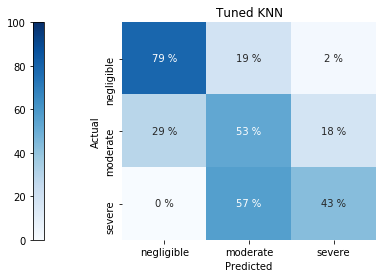

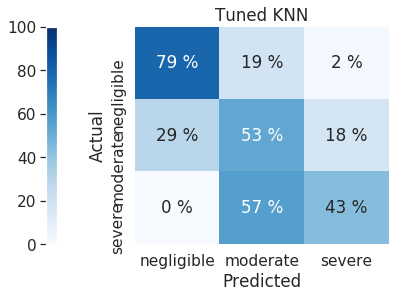

In [14]:
knn = KNeighborsClassifier(n_neighbors=18, metric="manhattan")

sm = SMOTE(sampling_strategy='not majority')
X_balanced, y_balanced = sm.fit_resample(X, y.values.ravel())
knn.fit(X_balanced, y_balanced.ravel())

y_pred = knn.predict(X_val)
metrix("Tuned KNN", y_val, y_pred)
metrix("Tuned KNN", y_val, y_pred)

## Best RNN: radius=6.0 and Euclidean Distance

In [15]:
rnn = RadiusNeighborsClassifier(outlier_label=0, radius=6.0, metric="euclidean")

sm = SMOTE(sampling_strategy='not majority')
X_balanced, y_balanced = sm.fit_resample(X, y.values.ravel())
rnn.fit(X_balanced, y_balanced.ravel())

y_pred = rnn.predict(X_val)


Confusion Matrix
[[1947  177   38]
 [  60   72   27]
 [   0    9   12]]

Confusion Matrix as Percentages
[[90.  8.  2.]
 [38. 45. 17.]
 [ 0. 43. 57.]]

F1 Score: 0.508086213168284
F0.5 Score: 0.4799954013176803
F2 Score: 0.563003643993799
Precision: 0.4683395190225934
Recall: 0.6416046005786462
Matthews Correlation: 0.3595544458281066
Accuracy: 0.8672075149444919
Mean Squared Error: 0.18146883005977796



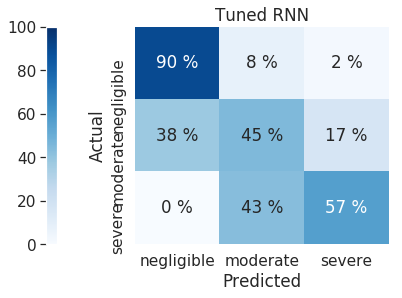

In [16]:
metrix("Tuned RNN", y_val, y_pred)